<a href="https://colab.research.google.com/github/khagerthey/VIS1/blob/main/PS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import time, os, sys, re
import zipfile, json, datetime, string 
import numpy as np
from statistics import *

import matplotlib.pyplot as plt 
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler

import urllib                                                 

from google.colab import files

import webbrowser                                                                      
import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap                                      

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() 

%matplotlib inline
%matplotlib 
#%matplotlib --list 
#interactive plots:
%matplotlib notebook  
#static images of your plot:
%matplotlib inline 
#may play with this one and other magics (btw default is probably agg)
%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;) 
plt.style.available #list available styles :) may install more
plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

Using matplotlib backend: <object object at 0x7f5f6c284c10>


#**Hypothesis:** 
Line 3 is experiencing high amounts of glass breakage due to thermal shock.


This food production company is currently investigating a high amount of glass breakages on their highest performing production line (3). Data recieved from said company is confidential, I am not premitted to link or post directly from source. All private information (including company name) has been removed.



aok: totally fine; can even give less info or trick people: eg "fertilizer company in bolivia"

#Investigating Loss

##Coding work

In [3]:
Loss=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/LOSS.csv')
Loss

,DAY,DEPALLETIZER TO FILLER,FILLER TO CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER TO TRAYMAKER
0,DAY 1,2,394,369,4538,180
1,DAY 2,739,6,19,-7070,5032
2,DAY 3,79,2430,4013,-5693,2720
3,DAY 4,892,1897,28512,-29711,253
4,DAY 5,78,2000,1044,-2510,553
5,DAY 6,37,1735,4127,-5728,400
6,DAY 7,124,1,-11,86,-84


In [4]:
print(Loss.sum()) #aok wonder whats up with negatives; may want to clean this up or explain whats going on

DAY                        DAY 1DAY 2DAY 3DAY 4DAY 5DAY 6DAY 7
DEPALLETIZER TO FILLER                                    1951
FILLER TO CAPPER                                          8463
CAPPER TO DUD DETECTOR                                   38073
DUD DETECTOR TO LABELER                                 -46088
LABELER TO TRAYMAKER                                      9054
dtype: object


Why are there negatives at the dud detector to the labeler? Negatives imply a gain in glass.

In [5]:
#Loss.dropna(axis = 0, how = 'all', inplace = True)
#Loss = Loss.rename(columns={'Unnamed: 0':'Location'})
#Loss

In [6]:
#Loss_transposed=Loss.T
#Loss.T
#Loss.T.dropna(axis = 0, how = 'all')

In [7]:
Start=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/START.csv')
Start.dropna(axis = 0, how = 'all')
#Start = Start.rename(columns={'Unnamed: 0':'Location'})
#NaN is okay, data not expected to be there
Start

,DAY,DEPALLETIZER,FILLER,CAPPER,DUD DETECTOR,LABELER,TRAYMAKER
0,DAY 1,39167.0,39165.0,38771.0,38402.0,33864.0,33684.0
1,DAY 2,1990.0,1251.0,1245.0,38402.0,8296.0,3264.0
2,DAY 3,140529.0,140450.0,138020.0,1226.0,139700.0,136980.0
3,DAY 4,11323.0,138020.0,111134.0,134007.0,112333.0,112080.0
4,DAY 5,120721.0,134007.0,118643.0,82622.0,120109.0,119556.0
5,DAY 6,120079.0,139700.0,118307.0,117599.0,119908.0,119508.0
6,DAY 7,200.0,136980.0,75.0,114180.0,0.0,84.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(Start.sum())

DEPALLETIZER     434009.0
FILLER           729573.0
CAPPER           526195.0
DUD DETECTOR     526438.0
LABELER          534210.0
TRAYMAKER        525156.0
dtype: float64


<ipython-input-8-9d50338e147d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(Start.sum())


In [9]:

#Start_transposed=Start.T
#Start.T
#Start.T.dropna(axis = 0, how = 'all')

In [10]:
Totalloss = pd.merge(Loss, Start, how='outer', on=['DAY'], indicator='there')
Totalloss

,DAY,DEPALLETIZER TO FILLER,FILLER TO CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER TO TRAYMAKER,DEPALLETIZER,FILLER,CAPPER,DUD DETECTOR,LABELER,TRAYMAKER,there
0,DAY 1,2.0,394.0,369.0,4538.0,180.0,39167.0,39165.0,38771.0,38402.0,33864.0,33684.0,both
1,DAY 2,739.0,6.0,19.0,-7070.0,5032.0,1990.0,1251.0,1245.0,38402.0,8296.0,3264.0,both
2,DAY 3,79.0,2430.0,4013.0,-5693.0,2720.0,140529.0,140450.0,138020.0,1226.0,139700.0,136980.0,both
3,DAY 4,892.0,1897.0,28512.0,-29711.0,253.0,11323.0,138020.0,111134.0,134007.0,112333.0,112080.0,both
4,DAY 5,78.0,2000.0,1044.0,-2510.0,553.0,120721.0,134007.0,118643.0,82622.0,120109.0,119556.0,both
5,DAY 6,37.0,1735.0,4127.0,-5728.0,400.0,120079.0,139700.0,118307.0,117599.0,119908.0,119508.0,both
6,DAY 7,124.0,1.0,-11.0,86.0,-84.0,200.0,136980.0,75.0,114180.0,0.0,84.0,both
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only


In [11]:
Totalloss.there.value_counts(sort=False)
#Okay, same data from before not expected to merge

left_only     0
right_only    2
both          7
Name: there, dtype: int64

In [12]:
Totalloss = pd.merge(Loss, Start, how='inner', on=['DAY'], indicator='there')
Totalloss

,DAY,DEPALLETIZER TO FILLER,FILLER TO CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER TO TRAYMAKER,DEPALLETIZER,FILLER,CAPPER,DUD DETECTOR,LABELER,TRAYMAKER,there
0,DAY 1,2,394,369,4538,180,39167.0,39165.0,38771.0,38402.0,33864.0,33684.0,both
1,DAY 2,739,6,19,-7070,5032,1990.0,1251.0,1245.0,38402.0,8296.0,3264.0,both
2,DAY 3,79,2430,4013,-5693,2720,140529.0,140450.0,138020.0,1226.0,139700.0,136980.0,both
3,DAY 4,892,1897,28512,-29711,253,11323.0,138020.0,111134.0,134007.0,112333.0,112080.0,both
4,DAY 5,78,2000,1044,-2510,553,120721.0,134007.0,118643.0,82622.0,120109.0,119556.0,both
5,DAY 6,37,1735,4127,-5728,400,120079.0,139700.0,118307.0,117599.0,119908.0,119508.0,both
6,DAY 7,124,1,-11,86,-84,200.0,136980.0,75.0,114180.0,0.0,84.0,both


In [13]:
TL = Totalloss[['DAY', 'DEPALLETIZER ', 'DEPALLETIZER TO FILLER', 'FILLER ', 'FILLER TO CAPPER', 'CAPPER', 'CAPPER TO DUD DETECTOR', 'DUD DETECTOR', 'DUD DETECTOR TO LABELER', 'LABELER ', 'LABELER TO TRAYMAKER', 'TRAYMAKER']]

#pd.set_option('precision',0) #aok this breaks

TL


#columns reordered for clearer comparision
#Gradient applied to make large loss more visable


,DAY,DEPALLETIZER,DEPALLETIZER TO FILLER,FILLER,FILLER TO CAPPER,CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER,LABELER TO TRAYMAKER,TRAYMAKER
0,DAY 1,39167.0,2,39165.0,394,38771.0,369,38402.0,4538,33864.0,180,33684.0
1,DAY 2,1990.0,739,1251.0,6,1245.0,19,38402.0,-7070,8296.0,5032,3264.0
2,DAY 3,140529.0,79,140450.0,2430,138020.0,4013,1226.0,-5693,139700.0,2720,136980.0
3,DAY 4,11323.0,892,138020.0,1897,111134.0,28512,134007.0,-29711,112333.0,253,112080.0
4,DAY 5,120721.0,78,134007.0,2000,118643.0,1044,82622.0,-2510,120109.0,553,119556.0
5,DAY 6,120079.0,37,139700.0,1735,118307.0,4127,117599.0,-5728,119908.0,400,119508.0
6,DAY 7,200.0,124,136980.0,1,75.0,-11,114180.0,86,0.0,-84,84.0


##Loss Results

In [14]:
TL[:20].style.background_gradient(cmap='Greens')

,DAY,DEPALLETIZER,DEPALLETIZER TO FILLER,FILLER,FILLER TO CAPPER,CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER,LABELER TO TRAYMAKER,TRAYMAKER
0,DAY 1,39167.000000,2,39165.000000,394,38771.000000,369,38402.000000,4538,33864.000000,180,33684.000000
1,DAY 2,1990.000000,739,1251.000000,6,1245.000000,19,38402.000000,-7070,8296.000000,5032,3264.000000
2,DAY 3,140529.000000,79,140450.000000,2430,138020.000000,4013,1226.000000,-5693,139700.000000,2720,136980.000000
3,DAY 4,11323.000000,892,138020.000000,1897,111134.000000,28512,134007.000000,-29711,112333.000000,253,112080.000000
4,DAY 5,120721.000000,78,134007.000000,2000,118643.000000,1044,82622.000000,-2510,120109.000000,553,119556.000000
5,DAY 6,120079.000000,37,139700.000000,1735,118307.000000,4127,117599.000000,-5728,119908.000000,400,119508.000000
6,DAY 7,200.000000,124,136980.000000,1,75.000000,-11,114180.000000,86,0.000000,-84,84.000000


The dud detector works to kick out bottles that are defective. This location is expected to have a large amount of missing bottles.
The filler area to capper is the area of concern.

##More Investigating

The negative amounts lead for inaccurate results either due to use error or the machine miscounting. The production line was monitored to see if glass was being added back incorrectly after the filler, it was not. Below are the results after recalibrating the machine.

In [47]:
NewLoss=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Line%203%20bottle%20count%20record%203-6-23%20to%202-25-23.xlsx%20-%20NEW%20LOSS%20(1).csv')
NewLoss

,DAY,DEPALLETIZER TO FILLER,FILLER TO CAPPER,CAPPER TO DUD DETECTOR,DUD DETECTOR TO LABELER,LABELER TO TRAYMAKER
0,DAY 1,18,1759,56,5038,730
1,DAY 2,64,2542,384,8499,653
2,DAY 3,19,953,194,6710,103
3,DAY 4,24,991,253,2116,332
4,DAY 5,306,2853,114,5533,759
5,DAY 6,288,1772,89,3752,734
6,DAY 7,92,82,106,7434,122


#Filler to the Labeler



Data provided by company glass supplier and limited for privacy. Salvaged broken glass are used for analysis. 

In [15]:
breakage=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/breakage.xlsx%20-%20Sheet2.csv')
breakage = breakage.rename(columns={'Months 2022':'MONTHS 2022'})
breakage
#there are 4 types of glass breakages
#renamed for the sake of merge

,MONTHS 2022,Stress Cracks,Impact Breakage,Spontaneous Breakage,Edge Damage
0,12,198,87,1,23
1,11,469,132,4,39
2,10,504,66,18,62
3,9,937,207,13,103
4,8,652,60,5,178
5,7,193,183,0,95
6,6,450,141,1,132
7,5,272,175,3,102
8,4,499,82,6,160
9,3,557,216,11,134


Text(0.5, 1.0, 'Cause of Breakage')

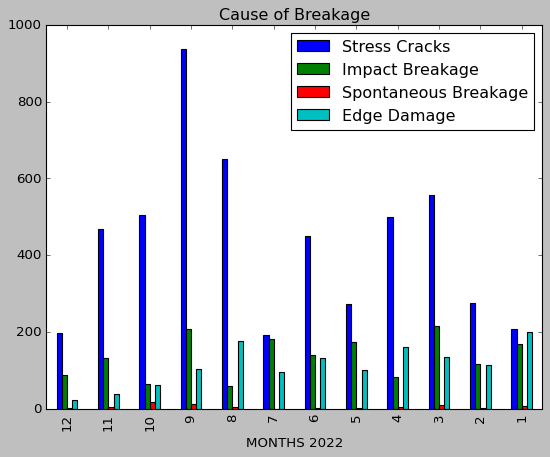

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
breakage.plot(x='MONTHS 2022', y=['Stress Cracks','Impact Breakage','Spontaneous Breakage','Edge Damage'], kind='bar')
#breakage.plot.bar(figsize = (13,10))
plt.title('Cause of Breakage')
#the different breakages recorded throughout 2022

The primary cause of breakage has been stress cracks which are the result of thermal shock.

aok
very nice! wonder whats up with september (mo #9); stress cracks lowest in 7, but also winter 1,2 and 12

#Glass POs

In [17]:
CHGlass=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/TOTAL%20SUM.csv')
CHGlass
#POs are product orders, below is the total amount of material ordered and recieved for each month

,MONTHS,TOTAL POS
0,12,324896
1,11,766480
2,10,793936
3,9,1267552
4,8,940368
5,7,336336
6,6,761934
7,5,441644
8,4,940368
9,3,1063920


In [18]:
CHGlass = CHGlass.rename(columns={'TOTAL POS':'TOTAL PRODUCT RECEIVED'})
CHGlass = CHGlass.rename(columns={'MONTHS':'MONTHS 2022'})
CHGlass
#New header gives better descriptions

,MONTHS 2022,TOTAL PRODUCT RECEIVED
0,12,324896
1,11,766480
2,10,793936
3,9,1267552
4,8,940368
5,7,336336
6,6,761934
7,5,441644
8,4,940368
9,3,1063920


In [19]:
print(CHGlass.sum())

MONTHS 2022                    78
TOTAL PRODUCT RECEIVED    8554922
dtype: int64


This are the total sum of glass ordered each month in 2022 with a grand total of 8554922 for the year. This is only glass used on line 3 which will be our main focus towards glass breakages.
This data was retrieved from our inventroy database via Windows SL.

In [44]:
mergedbreakage = pd.merge(CHGlass, breakage, how='inner', on=['MONTHS 2022'], indicator='both')
mergedbreakage

,MONTHS 2022,TOTAL PRODUCT RECEIVED,Stress Cracks,Impact Breakage,Spontaneous Breakage,Edge Damage,both
0,12,324896,198,87,1,23,both
1,11,766480,469,132,4,39,both
2,10,793936,504,66,18,62,both
3,9,1267552,937,207,13,103,both
4,8,940368,652,60,5,178,both
5,7,336336,193,183,0,95,both
6,6,761934,450,141,1,132,both
7,5,441644,272,175,3,102,both
8,4,940368,499,82,6,160,both
9,3,1063920,557,216,11,134,both


In [45]:
mergedbreakage["TOTAL PRODUCT RECEIVED"] /=1000
mergedbreakage['TOTAL PRODUCT RECEIVED'] = mergedbreakage['TOTAL PRODUCT RECEIVED'].astype(float).round(1)
mergedbreakage

,MONTHS 2022,TOTAL PRODUCT RECEIVED,Stress Cracks,Impact Breakage,Spontaneous Breakage,Edge Damage,both
0,12,324.9,198,87,1,23,both
1,11,766.5,469,132,4,39,both
2,10,793.9,504,66,18,62,both
3,9,1267.6,937,207,13,103,both
4,8,940.4,652,60,5,178,both
5,7,336.3,193,183,0,95,both
6,6,761.9,450,141,1,132,both
7,5,441.6,272,175,3,102,both
8,4,940.4,499,82,6,160,both
9,3,1063.9,557,216,11,134,both


Text(0.5, 1.0, 'Amount vs. Break')

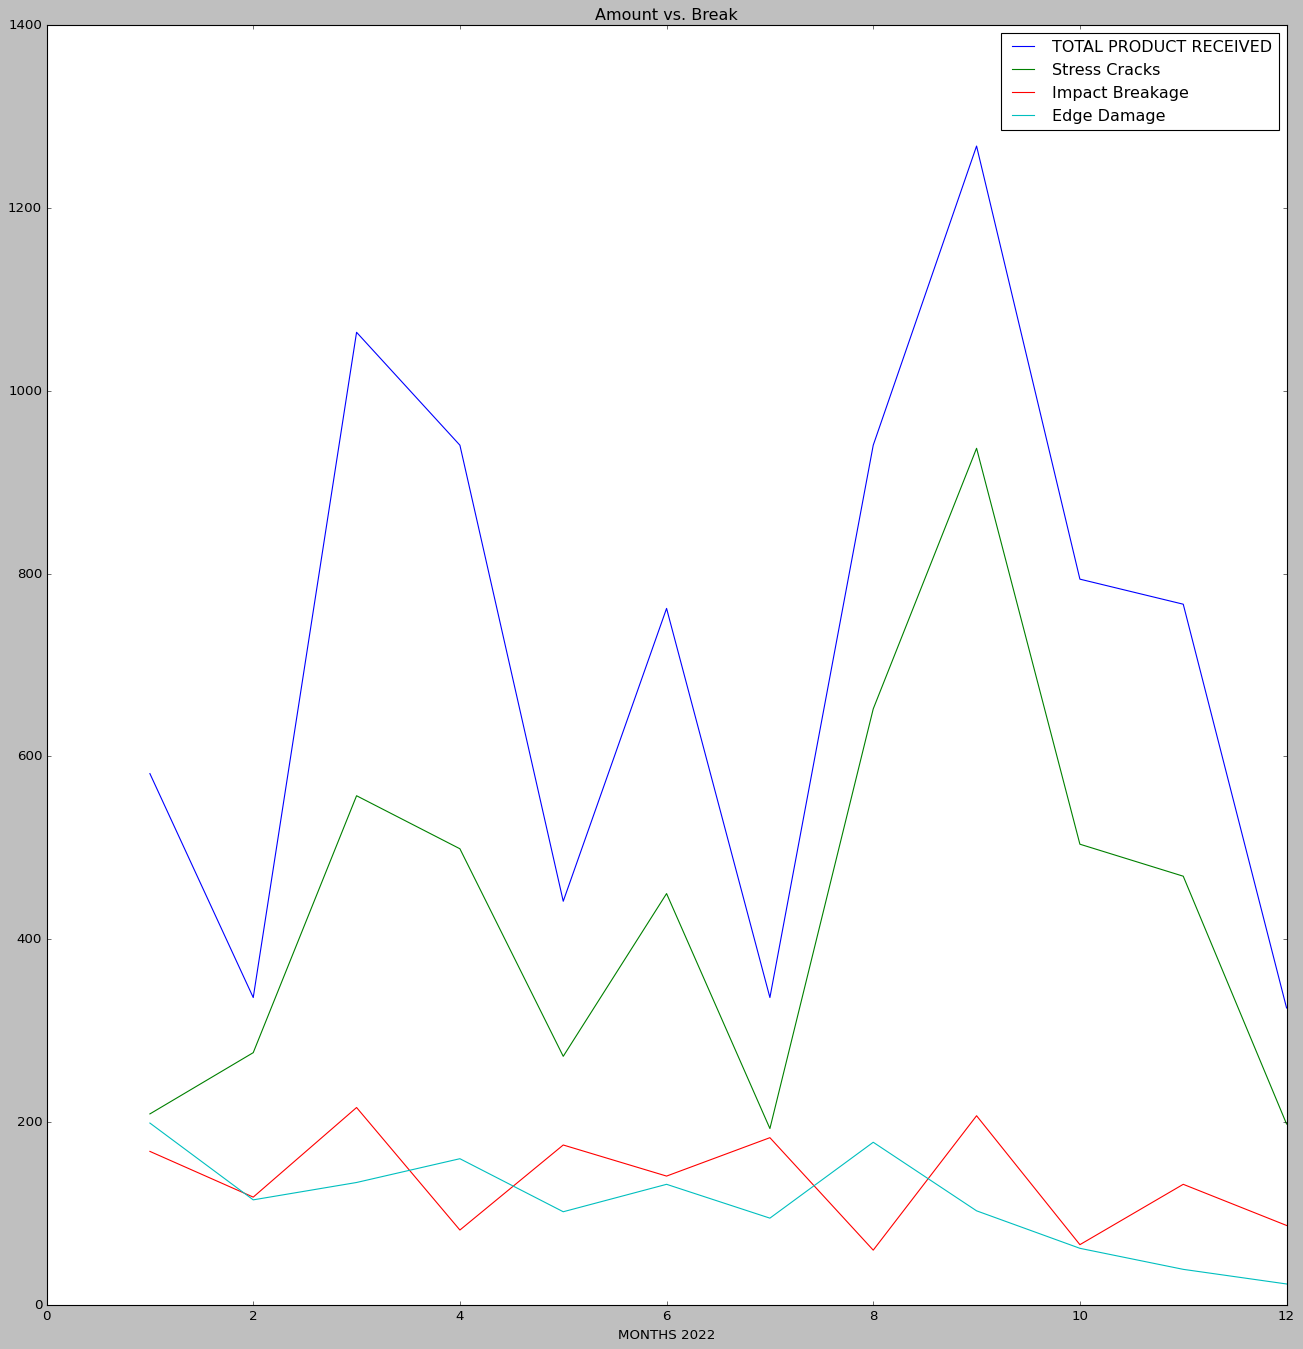

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
mergedbreakage.plot(x='MONTHS 2022', y=['TOTAL PRODUCT RECEIVED','Stress Cracks','Impact Breakage','Edge Damage'], kind='line', figsize=(20,20))
plt.title('Amount vs. Break')
#purpose of graph to show correlation of po to breakage
#TOTAL PRODUCT RECEIVED is shown in thousands

Add line 3 counter data for the week
- - counter only recorders 7 days (flaw in system lack of data to compare)

#Price/Profit Loss?

Price percentage increase throughout the years via NasDaq: https://data.nasdaq.com/data/FRED/PCU32723272-producer-price-index-by-industry-glass-and-glass-product-manufacturing

In [30]:
glass=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Glass%20price%20%25%20-%20Cleaned%20(2).csv')
glass['Glass Price Index %'] = glass['Glass Price Index %'].astype(float).round(3)
glass
#rounded to read easier

,Date,Glass Price Index %
0,2021,0.099
1,2020,0.026
2,2019,0.015
3,2018,0.032
4,2017,0.022
5,2016,0.021
6,2015,0.045
7,2014,0.017
8,2013,0.013
9,2012,0.016


This is the glass price index to give an idea of how prices have fluctuated.
Purpose of the price index is to show that glass is getting more expensive. The company recorded 8,265 broken bottles in 2022.

#Possible Option


In the case that my company would like to continue using glass, Borosilicate is a great glass alternative to Type 3 Soda-lime.
Below is a table sourced from Kopp Glass. https://www.koppglass.com/blog/3-common-glass-types-properties-and-applications

In [31]:
glasstypes=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Glass%20Types%20-%20Sheet1.csv')
glasstypes


,Glass Type,Primary Components,Linear Thermal Expansion,Thermal Shock Resistance,Chemical Resistance,Applications
0,Borosilicate,"SiO2, B2O3",-30-60 x 10-7/°C,Average - High,High,Industrial equipment\nExterior lighting\nLabor...
1,Soda-lime silicate,"SiO2, Na2O, CaO",-80-100 x 10-7/°C,Low,Average,Flood and beverage containers\nWindows\nLamp e...
2,Phosphates,P2O5,-90-110 x 10-7/°C,Low,"Low, except high resistance to hydrofluoric acid",Bone scaffolds\nOptical fibers\nHeat absorbers


This table shows and compares each type of glass. Borosilicate has a srtonger thermal shock resistance, making it a good solution to explore.


In [32]:
glasscompounds=pd.read_csv('https://raw.githubusercontent.com/khagerthey/VIS1/main/Glass%20compounds%20-%20Sheet4%20(1).csv')
glasscompounds = glasscompounds.rename(columns={'Compound':'Glass Type'})
glasscompounds['Glass Type'].replace({'Borosilicate Glass – % content':'Borosilicate'})
glasscompounds
#'Compound' header has been changed to 'Glass Type' to merge

,Glass Type,Silicon Dioxide SiO2,Boron Trioxide B2O3,Sodium Oxide Na2O,Aluminium Oxide Al2O3
0,Borosilicate Glass – % content,80.6,13,4,2.4
1,Soda Lime Glass – % content,69.0,1,13,4.0


Table sourced from CamLab. https://camblab.info/borosilicate-glass-vs-soda-lime-glass-vs-pyrex-what-is-the-difference/

This table shows the chemical make-up of the glass to explain what makes them different.


In [33]:
glasscompounds['Glass Type'] = glasscompounds['Glass Type'].replace(['Borosilicate Glass – % content'], 'Borosilicate')
glasscompounds['Glass Type'] = glasscompounds['Glass Type'].replace(['Soda Lime Glass – % content'], 'Soda-lime silicate')
#Material names changed to merge with first table
glasscompounds

,Glass Type,Silicon Dioxide SiO2,Boron Trioxide B2O3,Sodium Oxide Na2O,Aluminium Oxide Al2O3
0,Borosilicate,80.6,13,4,2.4
1,Soda-lime silicate,69.0,1,13,4.0


In [34]:
names = list(glasscompounds.columns)[1:]
names
values=glasscompounds[glasscompounds['Glass Type']=='Borosilicate'].values.flatten().tolist()[1:]
values

[80.6, 13, 4, 2.4]

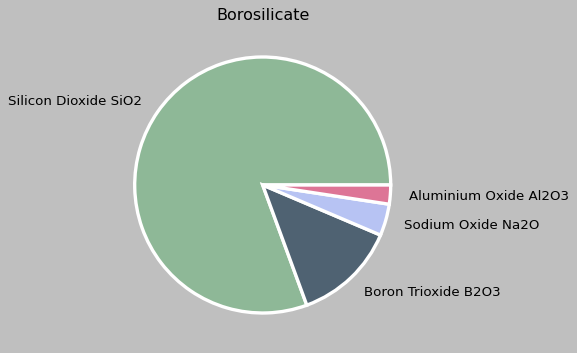

In [35]:
plt.rcParams["figure.figsize"] = (20,5)
#names='Silicon Dioxide SiO2','Boron Trioxide B2O3','Sodium Oxide Na2O','Aluminium Oxide AI2O3',
#values=[80.6,13,4,2.4]
colors = ['#8EB897','#4F6272', '#B7C3F3', '#DD7596']
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'}, colors=colors);
plt.title('Borosilicate')
plt.show();

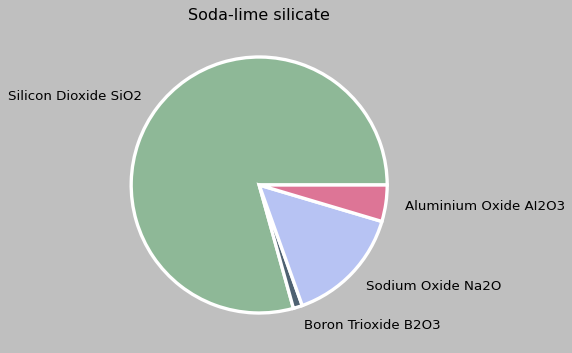

In [36]:
plt.rcParams["figure.figsize"] = (20,5)
names='Silicon Dioxide SiO2','Boron Trioxide B2O3','Sodium Oxide Na2O','Aluminium Oxide AI2O3',
values=[69,1,13,4]
colors = ['#8EB897','#4F6272', '#B7C3F3', '#DD7596']
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'}, colors=colors);
plt.title('Soda-lime silicate')
plt.show();

These pie charts show the clear difference in chemical composition between the two materials. Boron Trioxide B2O3 stands out the most as Borosilicate contains more, which contributes to it's high thermal shock resistance.

In [37]:
mergedglass = pd.merge(glasstypes, glasscompounds, how='outer', on=['Glass Type'], indicator='present')
mergedglass

,Glass Type,Primary Components,Linear Thermal Expansion,Thermal Shock Resistance,Chemical Resistance,Applications,Silicon Dioxide SiO2,Boron Trioxide B2O3,Sodium Oxide Na2O,Aluminium Oxide Al2O3,present
0,Borosilicate,"SiO2, B2O3",-30-60 x 10-7/°C,Average - High,High,Industrial equipment\nExterior lighting\nLabor...,80.6,13.0,4.0,2.4,both
1,Soda-lime silicate,"SiO2, Na2O, CaO",-80-100 x 10-7/°C,Low,Average,Flood and beverage containers\nWindows\nLamp e...,69.0,1.0,13.0,4.0,both
2,Phosphates,P2O5,-90-110 x 10-7/°C,Low,"Low, except high resistance to hydrofluoric acid",Bone scaffolds\nOptical fibers\nHeat absorbers,NaN,NaN,NaN,NaN,left_only


In [38]:
mergedglass.present.value_counts(sort=False)
#expected not to merge on Phosphates, as there was no data given on the second table

left_only     1
right_only    0
both          2
Name: present, dtype: int64

In [39]:
mergedglass = pd.merge(glasstypes, glasscompounds, how='inner', on=['Glass Type'], indicator='present')
mergedglass

,Glass Type,Primary Components,Linear Thermal Expansion,Thermal Shock Resistance,Chemical Resistance,Applications,Silicon Dioxide SiO2,Boron Trioxide B2O3,Sodium Oxide Na2O,Aluminium Oxide Al2O3,present
0,Borosilicate,"SiO2, B2O3",-30-60 x 10-7/°C,Average - High,High,Industrial equipment\nExterior lighting\nLabor...,80.6,13,4,2.4,both
1,Soda-lime silicate,"SiO2, Na2O, CaO",-80-100 x 10-7/°C,Low,Average,Flood and beverage containers\nWindows\nLamp e...,69.0,1,13,4.0,both


Borosilicate is a great alternative to Soda-lime. With it's high chemical resistence, it makes products taste better because it does not leach out. Borosilicate is more expensive than Soda-lime, but may be a cheaper solution than expanding the company's current glass heating storage.